In [4]:
import tensorflow as tf
import numpy as np

C:\Users\B-7\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
xy=np.loadtxt("data1/zoo.csv", delimiter=",", dtype=np.float32)
xy
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]
np.shape(xy) #(101, 17)
np.shape(xdata) #(101, 16)
np.shape(ydata) #(101, 1)

(101, 1)

In [6]:
nb_classes=7
x=tf.placeholder(tf.float32, shape=[None, 16])
y=tf.placeholder(tf.int32, shape=[None, 1]) #원핫 인코딩 대상은 int타입이어야 함

yonehot=tf.one_hot(y, nb_classes)
print("원핫 인코딩:", yonehot)
yonehot=tf.reshape(yonehot, [-1, nb_classes])
w=tf.Variable(tf.random_normal([16, nb_classes]))
b=tf.Variable(tf.random_normal([nb_classes]))
# xw+b => None, 16 16, 7 + 7 => None, 7
logits=tf.matmul(x,w)+b
hf=tf.nn.softmax(logits)
# ex) hf => 0:0.1, 1:0.0, 2:0.02, ... , 6:0.75 => 6 (예측)
# 실제값 yonehot(0000001) => argmax => 6(실제값)

costi=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=yonehot)
cost=tf.reduce_mean(costi)
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

prediction=tf.argmax(hf,1)
correction_prediction=tf.equal(prediction, tf.argmax(yonehot, 1))
accuracy=tf.reduce_mean(tf.cast(correction_prediction, tf.float32))



원핫 인코딩: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# x: 0~6 숫자 => 연속형 수치 => 원핫인코딩 => 차원이 1증가 => 원상태(2차원) 복구(reshape함)
# y: [[0], [3], ...] -> [[[1000000]], [[0001000]]] - > [[1000000], [0001000]]
#    (101, 1)        -> (101,1,7)
# 0:사자, 1:악어, 2:토끼. ...6:강아지 => 범주형(원핫인코딩)


In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step% 100==0:
            cv,av=sess.run([cost, accuracy], feed_dict={x:xdata, y:ydata})
            print("step:{:5}\tcost:{:.3f}\tacc:{:2%}".format(step, cv, av))

step:    0	cost:4.534	acc:22.772278%
step:  100	cost:0.675	acc:77.227724%
step:  200	cost:0.416	acc:88.118809%
step:  300	cost:0.308	acc:92.079210%
step:  400	cost:0.245	acc:93.069309%
step:  500	cost:0.203	acc:95.049506%
step:  600	cost:0.173	acc:95.049506%
step:  700	cost:0.150	acc:96.039605%
step:  800	cost:0.133	acc:96.039605%
step:  900	cost:0.119	acc:99.009901%
step: 1000	cost:0.107	acc:100.000000%
step: 1100	cost:0.098	acc:100.000000%
step: 1200	cost:0.090	acc:100.000000%
step: 1300	cost:0.083	acc:100.000000%
step: 1400	cost:0.077	acc:100.000000%
step: 1500	cost:0.072	acc:100.000000%
step: 1600	cost:0.068	acc:100.000000%
step: 1700	cost:0.064	acc:100.000000%
step: 1800	cost:0.061	acc:100.000000%
step: 1900	cost:0.057	acc:100.000000%
step: 2000	cost:0.055	acc:100.000000%


In [9]:
import seaborn as sns
import pandas as pd
data=pd.read_csv("iris.csv")

In [10]:
data.info()
data['Name'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

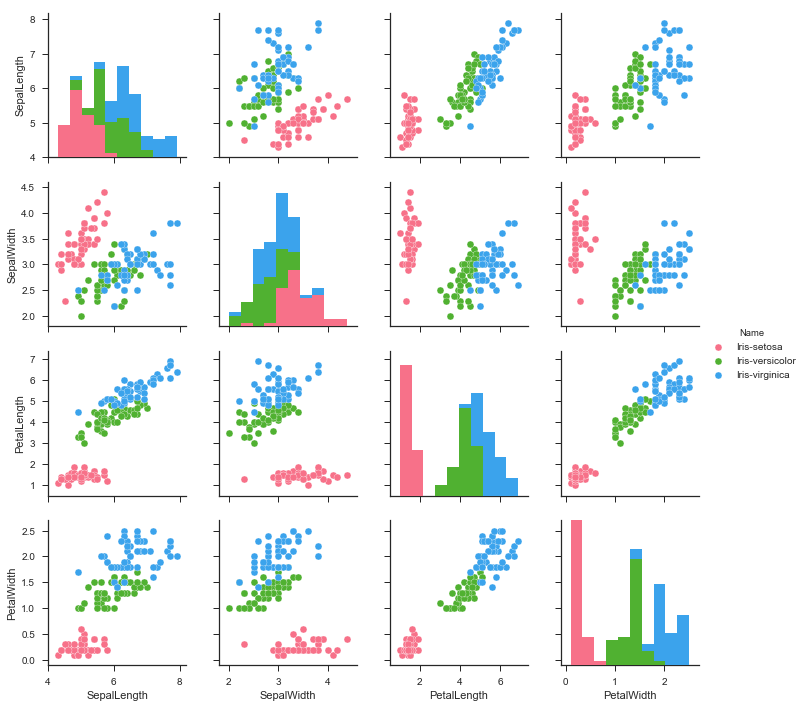

In [11]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data, hue='Name', palette='husl')

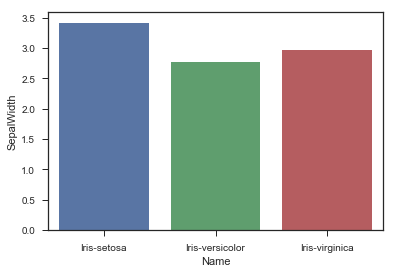

In [12]:
# 각 품종과 특성에 대한 연관 관계
sns.barplot(data['Name'], data['SepalWidth'], ci=None)

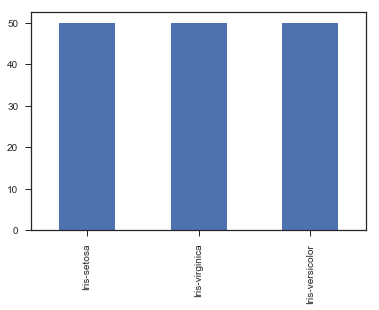

In [13]:
data['Name'].value_counts().plot(kind='bar')

In [14]:
#소프트맥스 분류 모델(Name(품종)열에 대해 수치화)
#Name열 -> 정수 인코딩 -> 원핫 인코딩
data['Name']=data['Name'].replace([['Iris-versicolor'],['Iris-virginica'],['Iris-setosa']],[0,1,2])
data['Name'].value_counts()

2    50
1    50
0    50
Name: Name, dtype: int64

In [15]:
data.info()
# data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
data_x=data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values
data_y=data['Name'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [16]:
data_x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
data_y[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
(xtrain, xtest, ytrain, ytest)=train_test_split(data_x, data_y, train_size=0.8, random_state=1)
xtest
xtrain

C:\Users\B-7\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([[6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2.8, 5.1, 2.4],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 3.5, 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 5.4, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3

In [19]:
#ydata에 대한 원핫 인코딩
from keras.utils import np_utils

Using TensorFlow backend.


In [20]:
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)
print(ytrain[:5])
print(ytest[:5])

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [21]:
#분류
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [22]:
model=Sequential()
model.add(Dense(3,input_dim=4,activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#여러개 분류이므로 categorical_crossentropy,
#이항 분류이면 binary_crossentropy

#모델생성
history=model.fit(xtrain, ytrain, epochs=200, batch_size=1, validation_data=(xtest, ytest))
#epochs:전체 데이터에 대한 훈련 횟수



Instructions for updating:
Use tf.cast instead.
Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 6.3777 - acc: 0.3083 - val_loss: 4.7879 - val_acc: 0.4333
Epoch 2/200
120/120 [==============================] - 0s 582us/step - loss: 4.6898 - acc: 0.3083 - val_loss: 3.4831 - val_acc: 0.4333
Epoch 3/200
120/120 [==============================] - 0s 557us/step - loss: 3.0838 - acc: 0.3083 - val_loss: 2.3623 - val_acc: 0.4333
Epoch 4/200
120/120 [==============================] - 0s 615us/step - loss: 1.9054 - acc: 0.3167 - val_loss: 1.7174 - val_acc: 0.4333
Epoch 5/200
120/120 [==============================] - 0s 532us/step - loss: 1.4173 - acc: 0.5083 - val_loss: 1.4457 - val_acc: 0.2667
Epoch 6/200
120/120 [==============================] - 0s 557us/step - loss: 1.2081 - acc: 0.3917 - val_loss: 1.2709 - val_acc: 0.2333
Epoch 7/200
120/120 [==============================] - 0s 573us/step - loss: 1.0872 - acc: 0.3833 -

120/120 [==============================] - 0s 540us/step - loss: 0.3511 - acc: 0.9667 - val_loss: 0.4098 - val_acc: 0.7667
Epoch 60/200
120/120 [==============================] - 0s 540us/step - loss: 0.3475 - acc: 0.9417 - val_loss: 0.4244 - val_acc: 0.7333
Epoch 61/200
120/120 [==============================] - 0s 532us/step - loss: 0.3479 - acc: 0.9000 - val_loss: 0.4147 - val_acc: 0.7667
Epoch 62/200
120/120 [==============================] - 0s 540us/step - loss: 0.3443 - acc: 0.9667 - val_loss: 0.4002 - val_acc: 0.8000
Epoch 63/200
120/120 [==============================] - 0s 540us/step - loss: 0.3433 - acc: 0.9333 - val_loss: 0.4081 - val_acc: 0.7667
Epoch 64/200
120/120 [==============================] - 0s 549us/step - loss: 0.3384 - acc: 0.9333 - val_loss: 0.3940 - val_acc: 0.8000
Epoch 65/200
120/120 [==============================] - 0s 540us/step - loss: 0.3358 - acc: 0.9083 - val_loss: 0.3781 - val_acc: 0.9333
Epoch 66/200
120/120 [==============================] - 0s 54

120/120 [==============================] - 0s 532us/step - loss: 0.2290 - acc: 0.9750 - val_loss: 0.2732 - val_acc: 0.9667
Epoch 120/200
120/120 [==============================] - 0s 549us/step - loss: 0.2285 - acc: 0.9750 - val_loss: 0.2744 - val_acc: 0.9333
Epoch 121/200
120/120 [==============================] - 0s 540us/step - loss: 0.2279 - acc: 0.9667 - val_loss: 0.2784 - val_acc: 0.9333
Epoch 122/200
120/120 [==============================] - 0s 549us/step - loss: 0.2269 - acc: 0.9750 - val_loss: 0.2704 - val_acc: 0.9667
Epoch 123/200
120/120 [==============================] - 0s 532us/step - loss: 0.2260 - acc: 0.9750 - val_loss: 0.2682 - val_acc: 0.9667
Epoch 124/200
120/120 [==============================] - 0s 549us/step - loss: 0.2240 - acc: 0.9833 - val_loss: 0.2762 - val_acc: 0.9333
Epoch 125/200
120/120 [==============================] - 0s 532us/step - loss: 0.2224 - acc: 0.9667 - val_loss: 0.2660 - val_acc: 0.9667
Epoch 126/200
120/120 [==============================] 

Epoch 179/200
120/120 [==============================] - 0s 532us/step - loss: 0.1720 - acc: 0.9750 - val_loss: 0.2176 - val_acc: 0.9667
Epoch 180/200
120/120 [==============================] - 0s 532us/step - loss: 0.1708 - acc: 0.9667 - val_loss: 0.2149 - val_acc: 0.9667
Epoch 181/200
120/120 [==============================] - 0s 524us/step - loss: 0.1705 - acc: 0.9833 - val_loss: 0.2193 - val_acc: 0.9667
Epoch 182/200
120/120 [==============================] - 0s 532us/step - loss: 0.1707 - acc: 0.9750 - val_loss: 0.2117 - val_acc: 0.9667
Epoch 183/200
120/120 [==============================] - 0s 540us/step - loss: 0.1697 - acc: 0.9667 - val_loss: 0.2117 - val_acc: 0.9667
Epoch 184/200
120/120 [==============================] - 0s 540us/step - loss: 0.1683 - acc: 0.9667 - val_loss: 0.2049 - val_acc: 0.9667
Epoch 185/200
120/120 [==============================] - 0s 532us/step - loss: 0.1681 - acc: 0.9667 - val_loss: 0.2125 - val_acc: 0.9667
Epoch 186/200
120/120 [==================

30/30 [==============================] - 0s 0us/step
테스트 정확도:0.9667


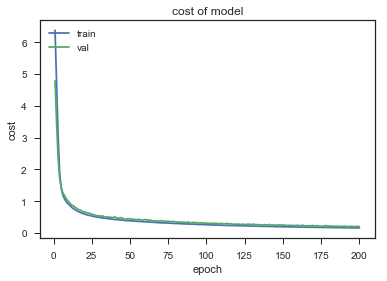

In [23]:
import matplotlib.pyplot as plt
epochs=range(1, len(history.history['acc'])+1)
epochs
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title("cost of model")
plt.ylabel("cost")
plt.xlabel("epoch")
plt.legend(['train', 'val'], loc="upper left")
plt.show
print("테스트 정확도:%.4f" %(model.evaluate(xtest, ytest)[1]))

In [24]:
print("테스트 정확도:%.4f" %(model.evaluate(xtest, ytest)[1]))

30/30 [==============================] - 0s 33us/step
테스트 정확도:0.9667


In [25]:
#문서간 유사
#문서의 단어들을 수치화 => TDM, Word2Vec
#문서간의 단어들의 차이를 비교 => 유클리디안, 코사인유사도


In [26]:
doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,2])

from numpy import dot
from numpy.linalg import norm

In [27]:
def cos_sim(A,B):
    return dot(A,B)/(norm(A)*norm(B))

In [28]:
print(cos_sim(doc1, doc2))
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))# 1로 2번과 3번이 가장 가까움

0.6666666666666667
0.6666666666666667
1.0000000000000002


In [29]:
data=pd.read_csv("movies_metadata.csv")
data.head(2)
data.shape #(45466,24)

C:\Users\B-7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45466, 24)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english")

In [41]:
data=data.head(30000)

In [42]:
# data.info()
data['overview']=data['overview'].fillna('') 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
adult                    30000 non-null object
belongs_to_collection    3354 non-null object
budget                   30000 non-null object
genres                   30000 non-null object
homepage                 4870 non-null object
id                       30000 non-null object
imdb_id                  29988 non-null object
original_language        29997 non-null object
original_title           30000 non-null object
overview                 30000 non-null object
popularity               29996 non-null object
poster_path              29837 non-null object
production_companies     29998 non-null object
production_countries     29998 non-null object
release_date             29969 non-null object
revenue                  29996 non-null float64
runtime                  29919 non-null float64
spoken_languages         29996 non-null object
status                   29955 non-null objec

In [44]:
tfidf_matrix=tfidf.fit_transform(data['overview'])
tfidf_matrix.shape

(30000, 58562)

In [53]:
from sklearn.metrics.pairwise import linear_kernel
cos_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

MemoryError: 

In [48]:
cos_sim.shape

(30000, 30000)

In [49]:
# data.index
# data['title']

res=pd.Series(data.index, index=data['title']).drop_duplicates() #중복데이터 해결
res.head()
res.tail()


title
Seventeen Again                      29995
Sweet Sixteen                        29996
The Disappearance of Garcia Lorca    29997
The Dramatics: A Comedy              29998
Up the Creek                         29999
dtype: int64

In [50]:
res['Up the Creek']

29999

In [ ]:
def get_recommender(title, cos_sim=cos_sim): #cos_sim=linear_kernel(tfidf_ma...)
    idx=res[title]
    sim_scores=list(enumerate(cos_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores=sim_scores[1:11]
    movie_res=[i[0] for i in sim_scores]
    return data['title'].iloc[movie_res]
    #return sim_scores
print(get_recommender('Toy Story'))